In [ ]:
!pip install numpy pandas matplotlib nltk pyLDAvis==2.1.2

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-09-03 08:26:17--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  12.0MB/s    in 1.3s    

2021-09-03 08:26:18 (12.0 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Upload file e import librerie

In [ ]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from datetime import datetime, timedelta
import time


import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer 
import gensim

from pprint import pprint
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
import spacy

import pyLDAvis
import pyLDAvis.gensim 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


plt.style.use('classic')
%matplotlib inline

sns.set()
drive.mount('/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['co' , 'k', 'c', 'h', 'x', 'r', 'l','u','b', 'e', 'f', 'cs', 'mj', 'cm'])
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~...'s|`` ’'''
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words and word not in punc] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
df_tweets = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_2021.csv")
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets.set_index(['date']).sort_index()

df_tweets['user_created'] = pd.to_datetime(df_tweets['user_created'])
df_tweets

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,debunking bitcoin myths by patrick lowry crypt...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,weekend read keen to learn about crypto assets...,['crypto'],Twitter Web App
2021-02-05 10:52:06,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,bloomberg lp cryptooutlook with mikemcglone cr...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App
2021-02-05 10:52:07,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,blockchain by delrayman forbes forbescrypto cr...,"['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App
2021-02-05 10:52:26,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,reddcoin rdd reddcoin to the moon altcoin turn...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,2020-10-25 12:23:58,265.0,415,15391,False,hodlingcarla wooohoooo k in sight bitcoin t co...,['bitcoin'],Twitter for iPhone
2021-07-30 23:59:56,The Last Sat,2020-09-14 04:00:03,3.0,18,11,False,before you know it we ll be under sats left t ...,"['Bitcoin', 'stayhumblestacksats']",Twitter for Android
2021-07-30 23:59:57,Air アーロン,2021-02-15 21:42:55,64.0,451,920,False,btc just hit jackie robinson,['btc'],Twitter for Android


In [ ]:
data = df_tweets.text.values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
print(data_words[:4])

[['debunking', 'bitcoin', 'myths', 'by', 'patrick', 'lowry', 'cryptocurrency', 'bitcoin', 'crypto', 'blockchain', 'btc', 'co', 'cm', 'fub'], ['weekend', 'read', 'keen', 'to', 'learn', 'about', 'crypto', 'assets', 'check', 'out', 'our', 'reading', 'list', 'cryptomarket', 'outlook', 'co', 'opiev', 'qzl'], ['bloomberg', 'lp', 'cryptooutlook', 'with', 'mikemcglone', 'cryptocurrency', 'bitcoin', 'crypto', 'blockchain', 'btc', 'co', 'gc', 'vngap'], ['blockchain', 'by', 'delrayman', 'forbes', 'forbescrypto', 'cryptocurrency', 'bitcoin', 'crypto', 'blockchain', 'co', 'xj', 'fx']]


In [ ]:
data_words_nostops = remove_stopwords(data_words)

In [ ]:
filtered_sent=[] #essendo presenti stessi elementi con diversi nomi questi vengono rinominati 
for s in data_words_nostops:
    sent=[]
    for w in s:
      if w=='btc' or w=='bitcoin':
          sent.append('BITCOIN')
      elif w=='eth' or w=='ethereum':
          sent.append('ETHEREUM')
      elif w=='doge' or w=='dogecoin':
          sent.append('DOGECOIN')    
      elif w=='bnb'or w=='binance':
          sent.append('BINANCE')  
      elif w=='amp':
          sent.append('AMP')  
      elif w=='xrp':
          sent.append('XRP')
      elif w=='nft':
          sent.append('APENFT')
      elif w=='ada':
          sent.append('CARDANO')   
      elif w=='bsc':
          sent.append('BOWSCOIN')
      elif w=='cryptocurrency' or w=='cryptocurrencies':
          sent.append('crypto')
      else:
        sent.append(w)
    filtered_sent.append(sent)

In [ ]:
#data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(filtered_sent[:1])

[['debunking', 'BITCOIN', 'myths', 'patrick', 'lowry', 'crypto', 'BITCOIN', 'crypto', 'blockchain', 'BITCOIN', 'fub']]


In [ ]:
id2word = corpora.Dictionary(filtered_sent)
texts = filtered_sent
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [ ]:
id2word[0]

'BITCOIN'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('BITCOIN', 3),
  ('blockchain', 1),
  ('crypto', 2),
  ('debunking', 1),
  ('fub', 1),
  ('lowry', 1),
  ('myths', 1),
  ('patrick', 1)]]

#Topic modeling

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=150,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.save("/gdrive/My Drive/TextAnalytics/datasets/tweet_2021.lda_model")
#lda_model = gensim.models.LdaModel.load("/gdrive/My Drive/TextAnalytics/datasets/tweet_2021.lda_model")

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"amp" + 0.029*"join" + 0.028*"elonmusk" + 0.027*"like" + '
  '0.021*"going" + 0.019*"token" + 0.018*"us" + 0.018*"saylor" + '
  '0.017*"michael" + 0.014*"investment"'),
 (1,
  '0.016*"people" + 0.015*"back" + 0.012*"short" + 0.012*"reward" + '
  '0.011*"news" + 0.010*"make" + 0.009*"trade" + 0.009*"chain" + 0.009*"also" '
  '+ 0.009*"would"'),
 (2,
  '0.056*"cryptocurrency" + 0.048*"project" + 0.045*"binance" + 0.038*"bsc" + '
  '0.030*"blockchain" + 0.020*"time" + 0.017*"market" + 0.017*"cake" + '
  '0.015*"rewards" + 0.014*"today"'),
 (3,
  '0.091*"get" + 0.042*"let" + 0.033*"right" + 0.023*"follow" + 0.020*"coming" '
  '+ 0.019*"network" + 0.018*"many" + 0.018*"surveyj" + 0.017*"kucoin" + '
  '0.015*"different"'),
 (4,
  '0.093*"bnb" + 0.042*"buy" + 0.024*"future" + 0.022*"link" + 0.016*"bscgem" '
  '+ 0.014*"green" + 0.013*"support" + 0.013*"know" + 0.013*"soon" + '
  '0.010*"hope"'),
 (5,
  '0.199*"bitcoin" + 0.156*"co" + 0.132*"btc" + 0.058*"crypto" + 0.026*"eth" + 

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_sent, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Coherence Score:  0.2776464946023703

Perplexity:  -9.436153377726898


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.431467 -0.037572       1        1  24.542264
2     -0.005267  0.386086       2        1  13.383333
1      0.011113 -0.165025       3        1  11.190228
6      0.051444  0.055516       4        1   9.019217
0      0.052560 -0.031172       5        1   8.530236
7      0.054074 -0.054451       6        1   8.498506
4      0.048126 -0.014520       7        1   8.301843
8      0.062384 -0.064028       8        1   7.582794
9      0.072748 -0.033269       9        1   5.790031
3      0.084287 -0.041565      10        1   3.161549, topic_info=              Term           Freq          Total Category  logprob  loglift
0          bitcoin  540223.000000  540223.000000  Default  30.0000  30.0000
4               co  423747.000000  423747.000000  Default  29.0000  29.0000
2              btc  358086.000000  358086.000000  Default  28.0000  28.0000
5           crypto  156873.000000  156873.000000  Default  27.0000  27.0000
69             bnb   84938.000000   84938.000000  Default  26.0000  26.0000
...            ...            ...            ...      ...      ...      ...
291      chainlink    1497.662575    1498.549699  Topic10  -5.4513   3.4535
2061          deal    1385.162306    1386.049423  Topic10  -5.5294   3.4535
338       exciting    1306.034147    1306.921225  Topic10  -5.5882   3.4534
562437  lbqogetakn    1604.728725    3917.685152  Topic10  -5.3822   2.5616
562436      bbjeju    1604.728725    3917.685152  Topic10  -5.3822   2.5616

[334 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
3990       9  0.999803          active
229        1  0.999968             ada
923        4  0.999992         airdrop
69851      4  0.999833  airdropinspect
11160      8  0.999935        airdrops
...      ...       ...             ...
259        7  0.999837             xtz
172        4  0.999877            year
1398       3  0.999925           years
2813       7  0.999789             yet
25474      4  0.999873    yieldfarming

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 2, 7, 1, 8, 5, 9, 10, 4])

# LDA Mallet

In [ ]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' 

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [ ]:
#ldamallet.save("/gdrive/My Drive/TextAnalytics/datasets/tweet_mallet.lda_model")
ldamallet = gensim.models.LdaModel.load("/gdrive/My Drive/TextAnalytics/datasets/tweet_mallet.lda_model")

In [ ]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=filtered_sent, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('BITCOIN', 0.028527200129202773),
   ('time', 0.016976147258656434),
   ('long', 0.014985286932744472),
   ('market', 0.013737951993856775),
   ('back', 0.012730332890129904),
   ('sell', 0.01146268304995739),
   ('target', 0.010997471810535104),
   ('short', 0.010867456442312283),
   ('support', 0.009903514376347766),
   ('stop', 0.009698333873371125)]),
 (1,
  [('BITCOIN', 0.18698817353297661),
   ('buy', 0.02293677034040563),
   ('today', 0.018359833198962214),
   ('free', 0.015703516906346405),
   ('earn', 0.011953423316771144),
   ('buying', 0.011084261000437294),
   ('wallet', 0.010029547178369251),
   ('trade', 0.009585742699741856),
   ('start', 0.009355702236492448),
   ('make', 0.009098534360124005)]),
 (2,
  [('BITCOIN', 0.35395671697251607),
   ('crypto', 0.1257594004485891),
   ('DOGECOIN', 0.034270953184669176),
   ('cryptotrading', 0.012753674446090962),
   ('twitter', 0.012542139170065409),
   ('blockchain', 0.011332246929940412),
   ('big', 0.00982128067261502

## Finding the optimal number of topic for LDA

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=filtered_sent, start=2, limit=20, step=3)

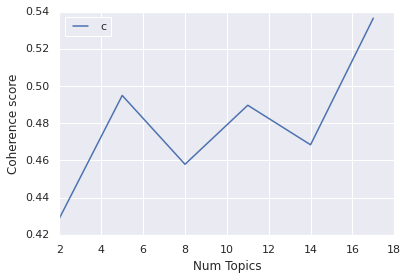

In [ ]:
limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.429
Num Topics = 5  has Coherence Value of 0.4949
Num Topics = 8  has Coherence Value of 0.4579
Num Topics = 11  has Coherence Value of 0.4897
Num Topics = 14  has Coherence Value of 0.4684
Num Topics = 17  has Coherence Value of 0.5365


In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.107*"ETHEREUM" + 0.041*"BITCOIN" + 0.034*"BINANCE" + 0.031*"XRP" + '
  '0.026*"DOGECOIN" + 0.024*"CARDANO" + 0.022*"buy" + 0.020*"crypto" + '
  '0.016*"altcoins" + 0.013*"sell"'),
 (1,
  '0.226*"BITCOIN" + 0.187*"crypto" + 0.067*"ETHEREUM" + 0.026*"APENFT" + '
  '0.013*"blockchain" + 0.012*"nfts" + 0.008*"love" + 0.007*"cryptocrash" + '
  '0.007*"nftart" + 0.006*"nftcommunity"'),
 (2,
  '0.133*"crypto" + 0.051*"blockchain" + 0.032*"money" + 0.031*"trading" + '
  '0.017*"cryptonews" + 0.016*"finance" + 0.014*"forex" + 0.014*"investment" + '
  '0.014*"cryptotrading" + 0.013*"olympicgames"'),
 (3,
  '0.012*"support" + 0.012*"back" + 0.011*"covid" + 0.011*"covidvaccine" + '
  '0.010*"long" + 0.010*"AMP" + 0.009*"time" + 0.009*"week" + 0.008*"daily" + '
  '0.008*"chart"'),
 (4,
  '0.113*"BINANCE" + 0.040*"BOWSCOIN" + 0.035*"elonmusk" + 0.033*"defi" + '
  '0.027*"DOGECOIN" + 0.019*"pancakeswap" + 0.017*"token" + 0.016*"safemoon" + '
  '0.012*"moon" + 0.012*"exchange"'),
 (5,
  '0.0